# Step 1 :
## Import Basix Scikit Learn Libraries for Data Manipulation as well Data Visualization.

In [34]:
# Import Data Manipulation Libraries
import numpy as np
import pandas as pd

# import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data Filter Warnings
import warnings
warnings.filterwarnings("ignore")

# Import Data Logging Libraries
import logging
logging.basicConfig(level=logging.INFO,
                    filename="model.log",
                    filemode="w",
                    format="%(asctime)s - %(levelname)s - %(message)s"
                    )

# Step 2 :
## Data Uploading Using Pandas Function

In [35]:
# Load the Dataset

url = "https://raw.githubusercontent.com/ankitmandhare1111/CementCompositeStrength_PredictionModel/refs/heads/main/concrete_data.csv"

df = pd.read_csv(url,sep= ",")

df.sample(frac = 1)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
409,167.4,129.9,128.6,175.5,7.8,1006.3,746.6,3,14.94
101,388.6,97.1,0.0,157.9,12.1,852.1,925.7,7,34.90
425,167.0,75.4,167.0,164.0,7.9,1007.3,770.1,14,32.90
335,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,14,38.77
455,213.5,0.0,174.2,159.2,11.7,1043.6,771.9,56,51.26
...,...,...,...,...,...,...,...,...,...
456,194.7,0.0,100.5,170.2,7.5,998.0,901.8,56,43.39
645,203.5,305.3,0.0,203.5,0.0,963.4,630.0,7,19.54
206,212.1,0.0,121.6,180.3,5.7,1057.6,779.3,28,24.90
904,155.0,183.0,0.0,193.0,9.0,877.0,868.0,28,23.79


# Step 3 :
## Doing Exporatory Data Analysis [EDA] :-->

**Univariate Analysis**

**Bi Variate Analysis**

In [36]:
# Perform Univariate Analysis
from collections import OrderedDict

stats =  [] 

for i in df.columns:
    numerical_stats = OrderedDict({
        'Feature': i,
        'Type': df[i].dtype,
        'Missing': df[i].isnull().sum(),
        'Unique': df[i].nunique(),
        'Mode': df[i].mode().values[0],
        'Mean': df[i].mean(),
        'Median': df[i].median(),
        'Standard Deviation': df[i].std(),
        'Min': df[i].min(),
        'Max': df[i].max(),
        'Range': df[i].max() - df[i].min(),
        'Skewness': df[i].skew(),
        'Kurtosis': df[i].kurt(),
        'IQR' : df[i].quantile(0.75) - df[i].quantile(0.25)
    })
    
    stats.append(numerical_stats)

df_stats = pd.DataFrame(stats)

df_stats.style.background_gradient(subset= ["Missing", "Unique", "Mode", "Mean", "Median", "Standard Deviation", "Min", "Max", "Range", "Skewness", "Kurtosis", "IQR"], cmap = "Reds")    

,Feature,Type,Missing,Unique,Mode,Mean,Median,Standard Deviation,Min,Max,Range,Skewness,Kurtosis,IQR
0,cement,float64,0,278,362.600000,281.167864,272.900000,104.506364,102.000000,540.000000,438.000000,0.509481,-0.520652,157.625000
1,blast_furnace_slag,float64,0,185,0.000000,73.895825,22.000000,86.279342,0.000000,359.400000,359.400000,0.800717,-0.508175,142.950000
2,fly_ash,float64,0,156,0.000000,54.188350,0.000000,63.997004,0.000000,200.100000,200.100000,0.537354,-1.328746,118.300000
3,water,float64,0,195,192.000000,181.567282,185.000000,21.354219,121.800000,247.000000,125.200000,0.074628,0.122082,27.100000
4,superplasticizer,float64,0,111,0.000000,6.204660,6.400000,5.973841,0.000000,32.200000,32.200000,0.907203,1.411269,10.200000
5,coarse_aggregate,float64,0,284,932.000000,972.918932,968.000000,77.753954,801.000000,1145.000000,344.000000,-0.040220,-0.599016,97.400000
6,fine_aggregate,float64,0,302,594.000000,773.580485,779.500000,80.175980,594.000000,992.600000,398.600000,-0.253010,-0.102177,93.050000
7,age,int64,0,14,28.000000,45.662136,28.000000,63.169912,1.000000,365.000000,364.000000,3.269177,12.168989,49.000000
8,concrete_compressive_strength,float64,0,845,33.400000,35.817961,34.445000,16.705742,2.330000,82.600000,80.270000,0.416977,-0.313725,22.425000


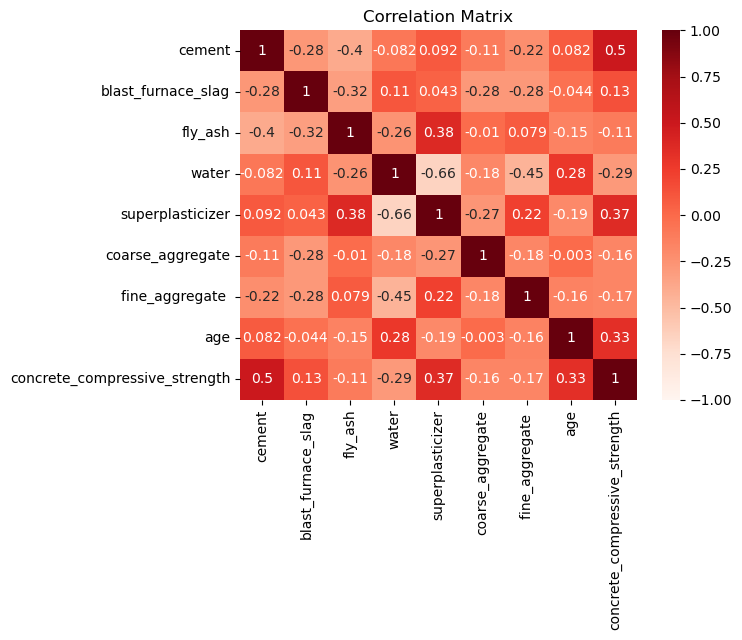

In [37]:
# Checking Correlation Matrix
# X = Independent Variables
# y =  Dependent Variable ---> ['concrete_compressive_strength']
# annot is for Displaying Numbers inside cell
sns.heatmap(df.corr(),annot=True, yticklabels=True,center= 0,vmax=1, vmin= -1 , cmap = "Reds")
plt.title("Correlation Matrix")
plt.show()
# X = df.drop('concrete_compressive_strength', axis = 1 )

In [38]:
# understanding feature and create new features based on existing features ----> feature engineering

df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Name: concrete_compressive_strength, dtype: float64

In [39]:
df['composite_Ratio']= (df['cement'] + df['superplasticizer']+ df['blast_furnace_slag'])/(df['water'])+ df['coarse_aggregate']

In [40]:
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,composite_Ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,1043.348765
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,1058.348765
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,934.083333
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,934.083333
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,980.123958
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,872.334410
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,819.596939
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,893.925688
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,991.633599


In [41]:
df['cement_to_water_ratio'] = df['cement'] /  df['water']

In [42]:
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,composite_Ratio,cement_to_water_ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,1043.348765,3.333333
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,1058.348765,3.333333
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,934.083333,1.458333
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,934.083333,1.458333
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,980.123958,1.034375
...,...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,872.334410,1.538976
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,819.596939,1.643878
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,893.925688,0.770628
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,991.633599,0.906036


In [43]:
df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
composite_Ratio                 -0.159372
cement_to_water_ratio            0.559522
Name: concrete_compressive_strength, dtype: float64

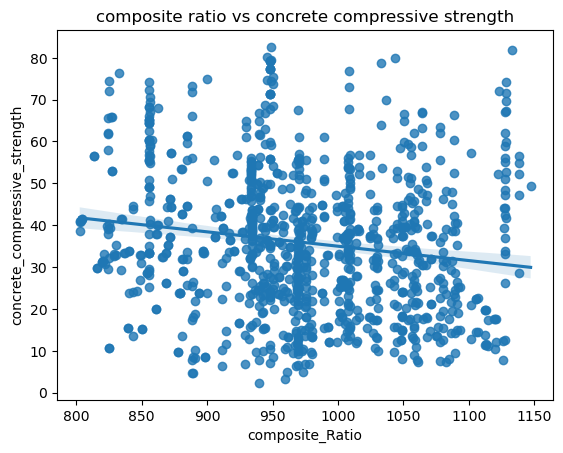

In [44]:
sns.regplot(x =df['composite_Ratio'],y=df['concrete_compressive_strength'])
plt.title('composite ratio vs concrete compressive strength')
plt.show()

<Axes: xlabel='composite_Ratio', ylabel='concrete_compressive_strength'>

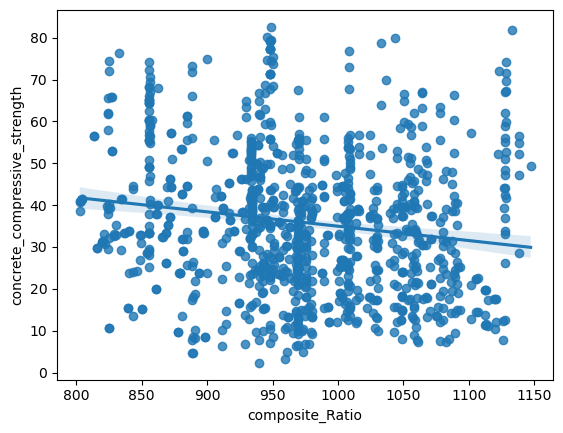

In [45]:
sns.regplot(x =df['composite_Ratio'],y=df['concrete_compressive_strength'])

#STEP 4 :

## splitting the data into training and testing sets also useing train and test split to prevent data lekage

In [46]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='concrete_compressive_strength', axis = 1)
y =df['concrete_compressive_strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
X

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,composite_Ratio,cement_to_water_ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,1043.348765,3.333333
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,1058.348765,3.333333
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,934.083333,1.458333
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,934.083333,1.458333
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,980.123958,1.034375
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,872.334410,1.538976
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,819.596939,1.643878
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,893.925688,0.770628
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,991.633599,0.906036


In [48]:
# using scaling techniques
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train= scaler .fit_transform(X_train)
X_test =  scaler.transform(X_test)

In [50]:
from sklearn.linear_model import LinearRegression

LR= LinearRegression()

LR.fit(X_train, y_train)

y_pred_LR = LR.predict(X_test)


from sklearn.metrics import mean_squared_error,r2_score, mean_squared_error

r2_score_LR = r2_score(y_test, y_pred_LR)

r2_score_LR

0.5941935306287813